## Cross-shelf transport sections figure

In [2]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [3]:
sns.set_context('paper')
sns.set_style('white')

In [4]:
def plotCSPos(ax,CS1,CS2,CS3,CS4):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [5]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

grid = xr.open_dataset(CGrid)


In [6]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [7]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [43]:
ii=0
for rec in records:
    print(ii,rec.name,rec.f)
    ii=ii+1
    
select_rec2=[1,3,5,6,7,10,13,14,15,16]
select_rec=[1,3,13,14,5,6,7,10,15]

0 CNTDIFF_run43 9.66e-05
1 CNTDIFF_run38 9.66e-05
2 CNTDIFF_run37 9.66e-05
3 CNTDIFF_run36 9.66e-05
4 CNTDIFF_run45 9.66e-05
5 CNTDIFF_run73 9.66e-05
6 CNTDIFF_run75 9.66e-05
7 CNTDIFF_run67 0.0001
8 CNTDIFF_run51 7.68e-05
9 CNTDIFF_run69 8.6e-05
10 CNTDIFF_run71 6.4e-05
11 3DVISC_run01 9.66e-05
12 3DVISC_run02 9.66e-05
13 3DVISC_run03 9.66e-05
14 3DVISC_run04 9.66e-05
15 LOW_BF_run01 9.66e-05
16 LOWER_BF_run01 9.66e-05


mean vert CNTDIFF_run38
<xarray.DataArray ()>
array(1.0)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean total CNTDIFF_run38
<xarray.DataArray ()>
array(1.0)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean vert CNTDIFF_run36
<xarray.DataArray ()>
array(1.082572340965271)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean total CNTDIFF_run36
<xarray.DataArray ()>
array(1.121065616607666)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean vert 3DVISC_run03
<xarray.DataArray ()>
array(1.0853548049926758)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean total 3DVISC_run03
<xarray.DataArray ()>
array(1.3380833864212036)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean vert 3DVISC_run04
<xarray.DataArray ()>
array(0.9811417460441589)
Coordinates:
    Yp1        float64 5.159e+04
    Zld000090  int64 30
mean total 3DVISC_run04
<xarray.DataAr

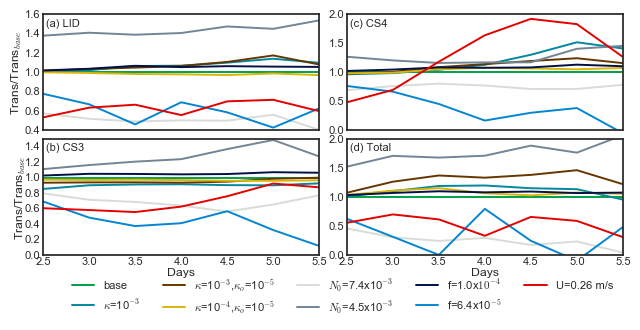

In [48]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,4.6)) # 190mm = 7.48 in, 115cm = 4.52in

gs = gspec.GridSpec(2, 2, height_ratios=[1,1,1],wspace=0.1,hspace=0.05)

ax0 = plt.subplot(gs[0,0],xticks=[])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0,1],xticks=[])
ax3 = plt.subplot(gs[1,1])


index_base = 1
file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[index_base].exp_code,records[index_base].run_num))+
        'advTracer_CS_transports.nc')
filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[index_base].exp_code,records[index_base].run_num))+
            'difTracer_CS_transports.nc')
fileNoC = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[index_base].exp_code,recordsNoC[index_base].run_num))+
            'advTracer_CS_transports.nc')
dfcan_base = xr.open_dataset(file)
dfdif_base = xr.open_dataset(filedif)
dfnoc_base = xr.open_dataset(fileNoC)
vertical_base = (dfdif_base.Vert_dif_trans_sb + dfcan_base.Vert_adv_trans_sb)-dfnoc_base.Vert_adv_trans_sb   
total_base = (dfcan_base.CS1_adv_trans-dfnoc_base.CS1_adv_trans +
             dfcan_base.CS2_adv_trans-dfnoc_base.CS2_adv_trans +
             dfcan_base.CS3_adv_trans-dfnoc_base.CS3_adv_trans +
             dfcan_base.CS4_adv_trans-dfnoc_base.CS4_adv_trans +
             dfcan_base.CS5_adv_trans-dfnoc_base.CS5_adv_trans +
             vertical_base)
    
for ind in select_rec:
    file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'advTracer_CS_transports.nc')
    filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
            'difTracer_CS_transports.nc')
    fileNoC = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
            'advTracer_CS_transports.nc')
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)

    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)-dfnoc.Vert_adv_trans_sb   
    print('mean vert %s' %records[ind].name)
    print(np.mean(vertical[5:11]/vertical_base[5:11]))
    ax0.plot(np.arange(1,19,1)/2.0,(vertical)/(vertical_base),color=sns.xkcd_rgb[records[ind].color])
    ax1.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans)/
             (dfcan_base.CS3_adv_trans-dfnoc_base.CS3_adv_trans),
             color=sns.xkcd_rgb[records[ind].color])
    ax2.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans)/
             (dfcan_base.CS4_adv_trans-dfnoc_base.CS4_adv_trans),
             color=sns.xkcd_rgb[records[ind].color])
    
    total = (dfcan.CS1_adv_trans-dfnoc.CS1_adv_trans +
             dfcan.CS2_adv_trans-dfnoc.CS2_adv_trans +
             dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans +
             dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans +
             dfcan.CS5_adv_trans-dfnoc.CS5_adv_trans +
             vertical)
    
    print('mean total %s' %records[ind].name)
    print(np.mean(total[5:11]/total_base[5:11]))
    
    ax3.plot(np.arange(1,19,1)/2.0,total/total_base,color=sns.xkcd_rgb[records[ind].color],label=records[ind].label)

ax1.set_xlabel('Days',labelpad=0.5)
ax3.set_xlabel('Days',labelpad=0.5)
    
ax0.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)
ax1.set_ylabel('Trans/Trans$_{base}$',labelpad=-2)

# General looks
ax0.text(0.01,0.9,'(a) LID',transform=ax0.transAxes)
ax1.text(0.01,0.9,'(b) CS3',transform=ax1.transAxes)    
ax2.text(0.01,0.9,'(c) CS4',transform=ax2.transAxes)
ax3.text(0.01,0.9,'(d) Total',transform=ax3.transAxes)    

ax3.legend(ncol=5,bbox_to_anchor=(1.0,-0.1))

ax1.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=2)
ax1.tick_params(axis='y', pad=2)
ax2.tick_params(axis='y', pad=2)
ax3.tick_params(axis='y', pad=2)

ax0.set_xlim(2.5,5.5)
ax1.set_xlim(2.5,5.5)
ax2.set_xlim(2.5,5.5)
ax3.set_xlim(2.5,5.5)

ax0.set_ylim(0.4,1.6)
ax1.set_ylim(0,1.5)
ax2.set_ylim(0,2)
ax3.set_ylim(0,2)

plt.savefig('fig_CS_transport_sections.eps',format='eps',bbox_inches='tight')



(0, 3.5)

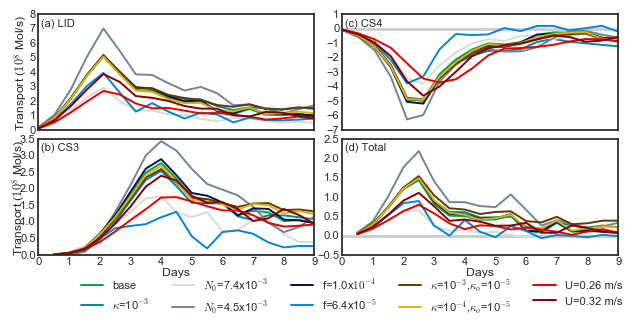

In [24]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,4.6)) # 190mm = 7.48 in, 115cm = 4.52in

gs = gspec.GridSpec(2, 2, height_ratios=[1,1,1],wspace=0.1,hspace=0.05)

ax0 = plt.subplot(gs[0,0],xticks=[])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0,1],xticks=[])
ax3 = plt.subplot(gs[1,1])


# Time series
ax0.axhline(0,color='0.8',linewidth=2)
ax1.axhline(0,color='0.8',linewidth=2)
ax2.axhline(0,color='0.8',linewidth=2)
ax3.axhline(0,color='0.8',linewidth=2)

for ind in select_rec2:
    file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'advTracer_CS_transports.nc')
    filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
            'difTracer_CS_transports.nc')
    fileNoC = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
            'advTracer_CS_transports.nc')
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)

    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)-dfnoc.Vert_adv_trans_sb   
    ax0.plot(np.arange(1,19,1)/2.0,(vertical)/1E5,color=sns.xkcd_rgb[records[ind].color])
    ax1.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans)/1E5,color=sns.xkcd_rgb[records[ind].color])
    ax2.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans)/1E5,color=sns.xkcd_rgb[records[ind].color])
    
    total = (dfcan.CS1_adv_trans-dfnoc.CS1_adv_trans +
             dfcan.CS2_adv_trans-dfnoc.CS2_adv_trans +
             dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans +
             dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans +
             dfcan.CS5_adv_trans-dfnoc.CS5_adv_trans +
             vertical)

    ax3.plot(np.arange(1,19,1)/2.0,total/1E5,color=sns.xkcd_rgb[records[ind].color],label=records[ind].label)

ax1.set_xlabel('Days',labelpad=0.5)
ax3.set_xlabel('Days',labelpad=0.5)
    
ax0.set_ylabel('Transport ($10^8$ Mol/s)',labelpad=0.5)
ax1.set_ylabel('Transport ($10^8$ Mol/s)',labelpad=-5)

# General looks
ax0.text(0.01,0.9,'(a) LID',transform=ax0.transAxes)
ax1.text(0.01,0.9,'(b) CS3',transform=ax1.transAxes)    
ax2.text(0.01,0.9,'(c) CS4',transform=ax2.transAxes)
ax3.text(0.01,0.9,'(d) Total',transform=ax3.transAxes)    

ax3.legend(ncol=5,bbox_to_anchor=(1.05,-0.1))

ax1.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=2)
ax1.tick_params(axis='y', pad=2)
ax2.tick_params(axis='y', pad=2)
ax3.tick_params(axis='y', pad=2)

ax1.set_ylim(0,3.5)

